<a href="https://colab.research.google.com/github/nanytahm/google-colab/blob/main/secretspandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pandas 

In [1]:
import pandas as pd

In [ ]:
#para leer archivos csv o excel y convertirlos en dataframe
titanic=pd.read_csv('titanic.csv')
pd.read_excel('enlace del archivo')
#para guardar cambios en tu df
df.to_csv('')/df.to_excel('')

In [3]:
users=pd.DataFrame(columns=['age','gender','hobby'], data=[[23,'Male','travelling'],[23,'Female','Volleyball'],[35,'Male','weiring'],[18,'None','skateboarding']])
users

,age,gender,hobby
0,23,Male,travelling
1,23,Female,Volleyball
2,35,Male,weiring
3,18,None,skateboarding


cada columna es una serie de objetos

In [7]:
type(users)


pandas.core.frame.DataFrame

In [6]:
type(users['age'])

pandas.core.series.Series

In [8]:
#para eliminar duplicados
users.drop_duplicates()

,age,gender,hobby
0,23,Male,travelling
1,23,Female,Volleyball
2,35,Male,weiring
3,18,None,skateboarding


In [9]:
users['age'].drop_duplicates()

0    23
2    35
3    18
Name: age, dtype: int64

In [10]:
#indicamos que la columa age sera nuestros indices
users.set_index('age')

,gender,hobby
age,,
23,Male,travelling
23,Female,Volleyball
35,Male,weiring
18,None,skateboarding


In [37]:
#otra forma de ordenar
users.sort_values(by='age',ascending=False)


,index,age,gender,hobby,age in ten years,gender in binary
3,2,35,Male,weiring,45,1.0
1,0,23,Male,travelling,33,1.0
2,1,23,Female,Volleyball,33,0.0
0,3,18,None,skateboarding,28,NaN


In [11]:
#ordenamos df por la edad 
users.sort_values('age',inplace=True)
users

,age,gender,hobby
3,18,None,skateboarding
0,23,Male,travelling
1,23,Female,Volleyball
2,35,Male,weiring


In [ ]:
#despues de ordenar por edad nuestra tabla, alteramos el orden de nuestros indices
#por lo que nuestro grafico no esta correcto
users['age'].plot()

In [13]:
#solucion:
users.reset_index(inplace=True)
users

,index,age,gender,hobby
0,3,18,None,skateboarding
1,0,23,Male,travelling
2,1,23,Female,Volleyball
3,2,35,Male,weiring


In [ ]:
#ahora se aprecia mejor nuestro grafico
users['age'].plot()

In [35]:
#en este caso, usando drop=tru, modificamos nuestro indice original poniendolo en orden
users[users['age']==23].reset_index(drop=True)

,index,age,gender,hobby,age in ten years,gender in binary
0,0,23,Male,travelling,33,1.0
1,1,23,Female,Volleyball,33,0.0


In [15]:
#agregamos una columna en la tabla
users['age in ten years']=users['age']+10
users

,index,age,gender,hobby,age in ten years
0,3,18,None,skateboarding,28
1,0,23,Male,travelling,33
2,1,23,Female,Volleyball,33
3,2,35,Male,weiring,45


In [17]:
#usamos apply con funcion lambda
users['gender in binary']=users['gender'].apply(lambda x: 1 if x=='Male'else(0 if x=='Female' else None))
users

,index,age,gender,hobby,age in ten years,gender in binary
0,3,18,None,skateboarding,28,NaN
1,0,23,Male,travelling,33,1.0
2,1,23,Female,Volleyball,33,0.0
3,2,35,Male,weiring,45,1.0


In [18]:
users.fillna('this used to be empty')

,index,age,gender,hobby,age in ten years,gender in binary
0,3,18,None,skateboarding,28,this used to be empty
1,0,23,Male,travelling,33,1.0
2,1,23,Female,Volleyball,33,0.0
3,2,35,Male,weiring,45,1.0


In [19]:
#
users['gender']=='Male'

0    False
1     True
2    False
3     True
Name: gender, dtype: bool

In [20]:
#dentro de dataframe, segun la condicion, solo nos muestra los true
users[users['gender']=='Male']

,index,age,gender,hobby,age in ten years,gender in binary
1,0,23,Male,travelling,33,1.0
3,2,35,Male,weiring,45,1.0


In [22]:
#insa nos muestra las filas con valos None
#al negar la condicional, nos muestra todos los que no tienen valor none
users[~users['gender'].isna()]

,index,age,gender,hobby,age in ten years,gender in binary
0,3,18,None,skateboarding,28,NaN
1,0,23,Male,travelling,33,1.0
2,1,23,Female,Volleyball,33,0.0
3,2,35,Male,weiring,45,1.0


In [23]:
#isna, filtra los que tengan los valores dentro de isin()
users[users['age'].isin([23,35,48,97])]

,index,age,gender,hobby,age in ten years,gender in binary
1,0,23,Male,travelling,33,1.0
2,1,23,Female,Volleyball,33,0.0
3,2,35,Male,weiring,45,1.0


In [24]:
#extraer partes de un dataframe
users[['age','gender']]

,age,gender
0,18,None
1,23,Male
2,23,Female
3,35,Male


In [25]:
#para extraer todos los datos de la fila 2
users.loc[2]

index                        1
age                         23
gender                  Female
hobby               Volleyball
age in ten years            33
gender in binary           0.0
Name: 2, dtype: object

In [30]:
# condicionales and & or |
users[(users['age'] < 25) & (users['gender']=='Male') ]

,index,age,gender,hobby,age in ten years,gender in binary
1,0,23,Male,travelling,33,1.0


In [31]:
users[users['age']!=23]

,index,age,gender,hobby,age in ten years,gender in binary
0,3,18,None,skateboarding,28,NaN
3,2,35,Male,weiring,45,1.0


In [33]:
#cambiar nombre a la columna
users.rename(columns = {'gender':'genders'})

,index,age,genders,hobby,age in ten years,gender in binary
0,3,18,None,skateboarding,28,NaN
1,0,23,Male,travelling,33,1.0
2,1,23,Female,Volleyball,33,0.0
3,2,35,Male,weiring,45,1.0


In [41]:
#uso de lower, devuelve una serie, si queremos preservar esta info ppodemos agregarlo como otra columna
users['hobby'].str.lower()


0    skateboarding
1       travelling
2       volleyball
3          weiring
Name: hobby, dtype: object

In [43]:
#para seleecionar palabras que contegan ""
users[users['hobby'].str.contains("ing")]

,index,age,gender,hobby,age in ten years,gender in binary
0,3,18,None,skateboarding,28,NaN
1,0,23,Male,travelling,33,1.0
3,2,35,Male,weiring,45,1.0


In [ ]:
#une dos df, poniendo al final el 2do df con sus propios indices
pd.concat([nombredf1,nombredf2])
#merge 
titanic.merge(extra_info es otro df,how='left',on='key en comun')

In [44]:
#AGGREGATION
#describe para todos los datos/sacar info de uno solo asi users['age'].mean()
users.describe()

,index,age,age in ten years,gender in binary
count,4.000000,4.000000,4.000000,3.000000
mean,1.500000,24.750000,34.750000,0.666667
std,1.290994,7.228416,7.228416,0.577350
min,0.000000,18.000000,28.000000,0.000000
25%,0.750000,21.750000,31.750000,0.500000
50%,1.500000,23.000000,33.000000,1.000000
75%,2.250000,26.000000,36.000000,1.000000
max,3.000000,35.000000,45.000000,1.000000


In [45]:
#value counts: para saber cuantas veces aparece cada valor de la columna que queremos
users['age'].value_counts()

23    2
18    1
35    1
Name: age, dtype: int64

In [48]:
#groupby
users.groupby('gender')['age'].mean()

gender
Female    23.0
Male      29.0
None      18.0
Name: age, dtype: float64

<Axes: >

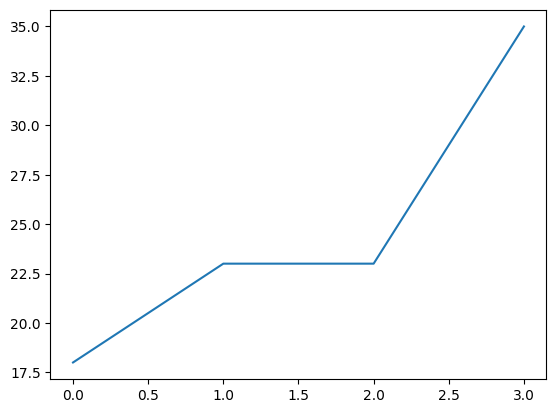

In [50]:
#plotting
users['age'].plot()

#groupby function
